In [3]:

'''
Reference code for data loading. 
Author: Chongyang Bai
For more details, refer to the paper:
C.Bai, S. Kumar, J. Leskovec, M. Metzger, J.F. Nunamaker, V.S. Subrahmanian,
Predicting Visual Focus of Attention in Multi-person Discussion Videos,
International Joint Conference on Artificial Intelligence (IJCAI), 2019.
'''

import numpy as np
import pandas as pd

def loadGame(game, N):
	# N is the number of players in the game
	# load csv data
	# unweighted and weighted networks can be loaded exactly the same way
	# below shows the loader for weighted networks
	# df_network = pd.read_csv(f'{src}/network{game}_weighted.csv', index_col = 0)
	df_network = pd.read_csv(f'{src}/network{game}.csv', index_col = 0)

	# T is number of timestamps (10 frames)
	T = len(df_network)
	# load VFOA network to T x N x (N+1) array
	# vfoa[t, n, i] is the probability of player n+1 looking at object i at time t
	# i: 0 - laptop, 1 - player 1, 2 - player 2, ..., N - player N
	vfoa = np.reshape(df_network.values, (T,N,N+1))

	# print information
	print(f'network id:{game}\t length(x 1/3 second): {T}\t num of players: {N}')
	return vfoa

src = './network' # root dir of data
meta = pd.read_csv('network_list.csv')

for _, row in meta.iterrows():
	loadGame(row['NETWORK'], row['NUMBER_OF_PARTICIPANTS'])

network id:0	 length(x 1/3 second): 7323	 num of players: 7
network id:1	 length(x 1/3 second): 5328	 num of players: 8
network id:2	 length(x 1/3 second): 7533	 num of players: 7
network id:3	 length(x 1/3 second): 6264	 num of players: 7
network id:4	 length(x 1/3 second): 7323	 num of players: 8
network id:5	 length(x 1/3 second): 9651	 num of players: 8
network id:6	 length(x 1/3 second): 7260	 num of players: 7
network id:7	 length(x 1/3 second): 7245	 num of players: 6
network id:8	 length(x 1/3 second): 6243	 num of players: 7
network id:9	 length(x 1/3 second): 8340	 num of players: 8
network id:10	 length(x 1/3 second): 6681	 num of players: 7
network id:11	 length(x 1/3 second): 5415	 num of players: 7
network id:12	 length(x 1/3 second): 5571	 num of players: 8
network id:13	 length(x 1/3 second): 7173	 num of players: 7
network id:14	 length(x 1/3 second): 9429	 num of players: 8
network id:15	 length(x 1/3 second): 5466	 num of players: 6
network id:16	 length(x 1/3 second

In [4]:
game = loadGame(1,8) 


network id:1	 length(x 1/3 second): 5328	 num of players: 8


In [5]:
print(game)

[[[0 0 0 ... 0 1 0]
  [0 0 0 ... 1 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 1 0 0]
  [0 0 0 ... 0 1 0]]

 [[0 0 0 ... 0 0 1]
  [0 0 0 ... 1 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 1 0 0]
  [0 0 0 ... 0 1 0]]

 [[0 0 0 ... 0 0 1]
  [0 0 0 ... 1 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]]

 ...

 [[0 0 0 ... 1 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 1 0 0]]

 [[0 0 0 ... 1 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 1 0 0]]

 [[0 0 0 ... 0 1 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 1 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 1 0 0]]]


In [6]:
g=game[0]
for i in range(1,len(game)):
        g = g + game[i]
print(g)

[[ 389    0  301  711  491  577 1511  770  578]
 [ 102  293    0  277 1769 1399 1269  133   86]
 [  29  474  241    0 1454 1044  994  726  366]
 [ 219  352   93 1218    0 1605 1361  340  140]
 [ 711  932  582  252  827    0 1535  217  272]
 [  41  837  334  791 1350 1169    0  576  230]
 [ 246  468  129  511  906  864 2186    0   18]
 [ 402  296   45  127  512 1431 1511 1004    0]]


In [7]:
game = game[:, :, :-1]
print(game[0])

[[0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


In [8]:
import networkx as nx
G = nx.from_numpy_matrix(game[0])
nx.draw(G, with_labels=True)

/Users/jackiecuong/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [9]:
game2 = loadGame(1,8)
game2 = game2[:, :, :-1]
print(game[0])

network id:1	 length(x 1/3 second): 5328	 num of players: 8
[[0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


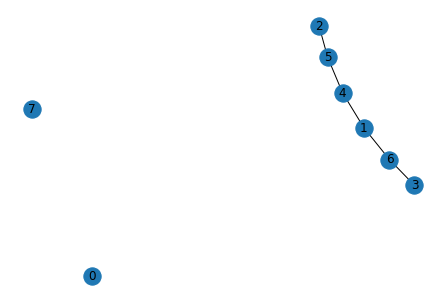

In [10]:

G = nx.from_numpy_matrix(game2[1])
nx.draw(G, with_labels=True)

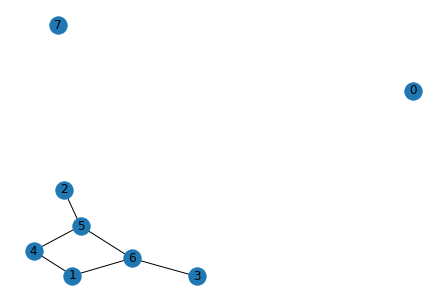

In [11]:

G = nx.from_numpy_matrix(game2[2])
nx.draw(G, with_labels=True)

In [12]:
matrix = game2[0]
print(matrix)

[[0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


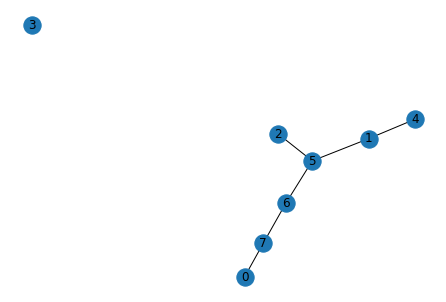

In [13]:

G = nx.from_numpy_matrix(game2[3])
nx.draw(G, with_labels=True)

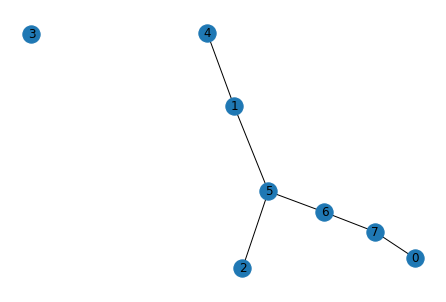

In [14]:

G = nx.from_numpy_matrix(game2[4])
nx.draw(G, with_labels=True)

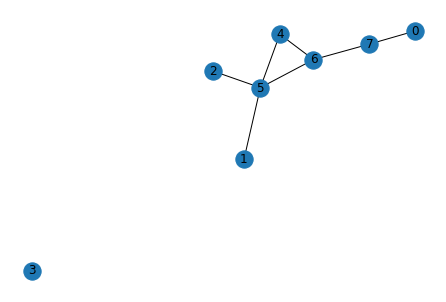

In [15]:

G = nx.from_numpy_matrix(game2[5])
nx.draw(G, with_labels=True)

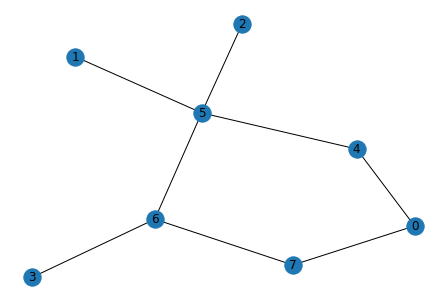

In [16]:

G = nx.from_numpy_matrix(game2[6])
nx.draw(G, with_labels=True)

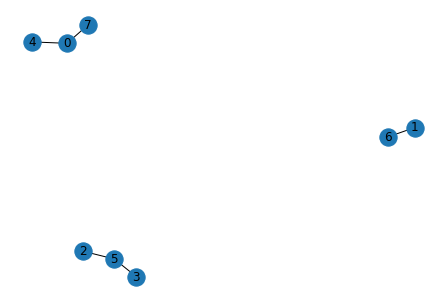

In [17]:

G = nx.from_numpy_matrix(game2[7])
nx.draw(G, with_labels=True)

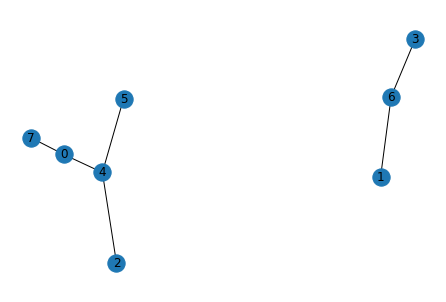

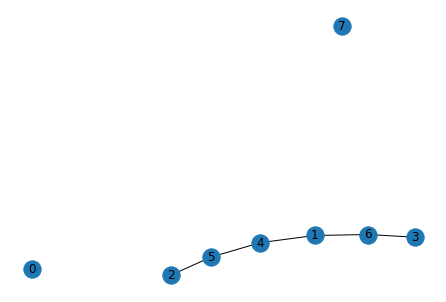

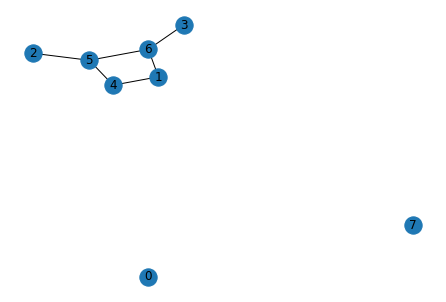

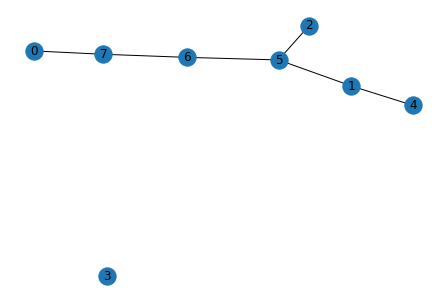

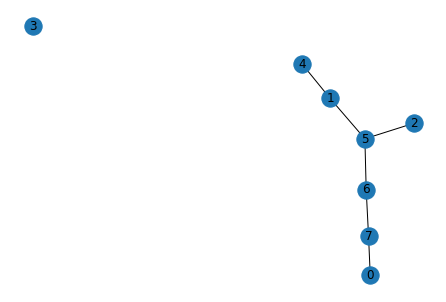

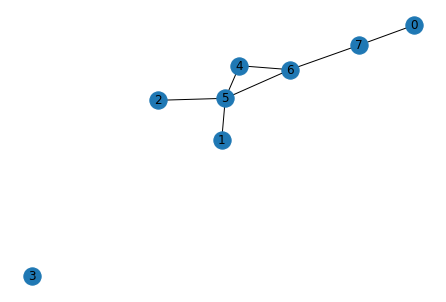

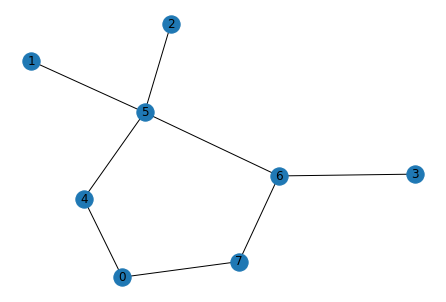

In [18]:
import matplotlib.pyplot as plt

for i in range(7):
    G = nx.from_numpy_matrix(game[i])
    plt.figure(i)
    nx.draw(G,with_labels=True)
plt.show()

In [19]:
game3 = loadGame(2,7)
game3 = game3[:, :, :-1]
print(game[0])

network id:2	 length(x 1/3 second): 7533	 num of players: 7
[[0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


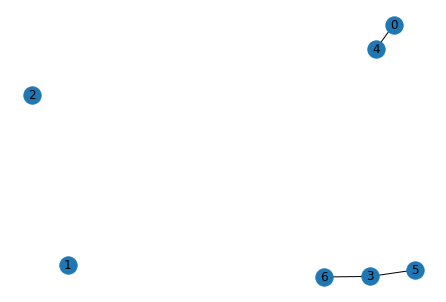

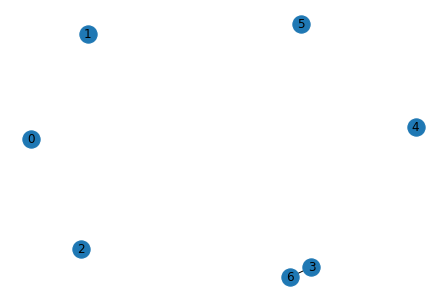

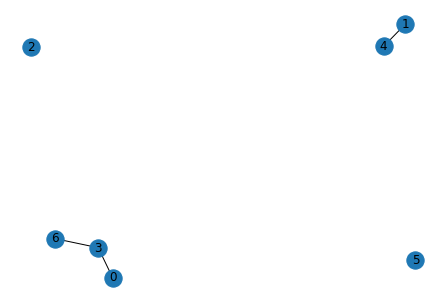

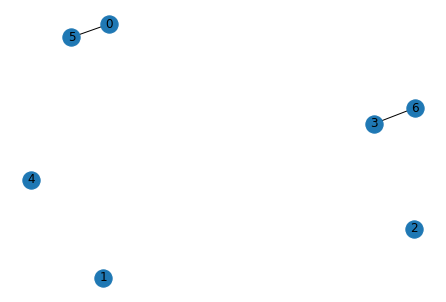

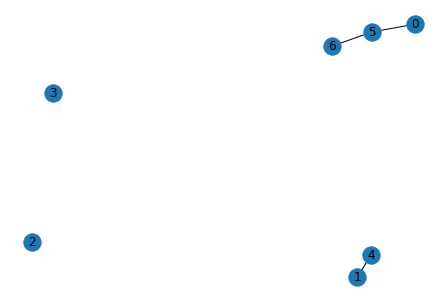

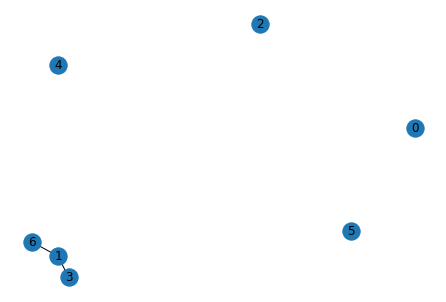

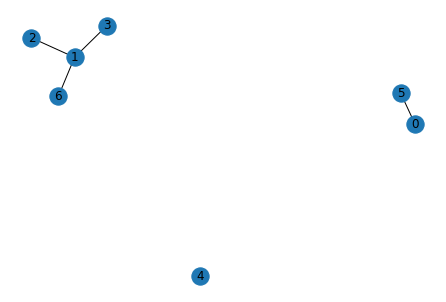

In [20]:
for i in range(7):
    G = nx.from_numpy_matrix(game3[i])
    plt.figure(i)
    nx.draw(G,with_labels=True)
plt.show()

In [21]:
game4 = loadGame(4,8)
game4 = game4[:, :, :-1]
print(game4[0])

network id:4	 length(x 1/3 second): 7323	 num of players: 8
[[0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]]


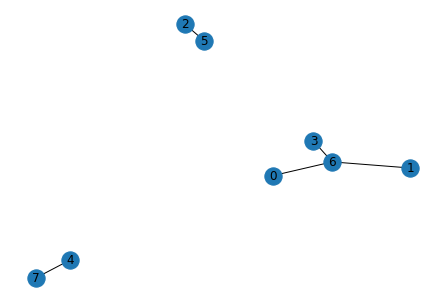

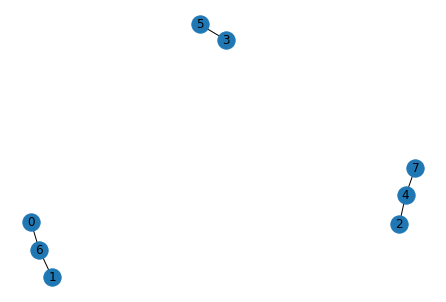

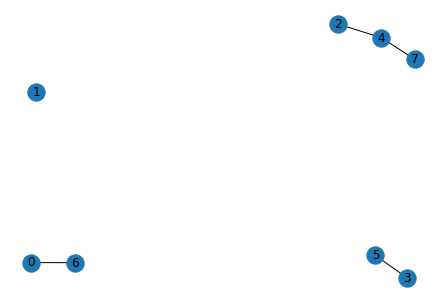

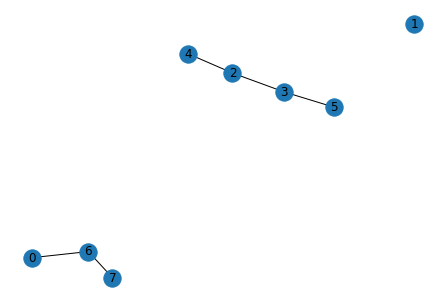

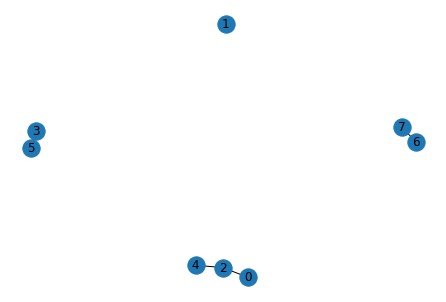

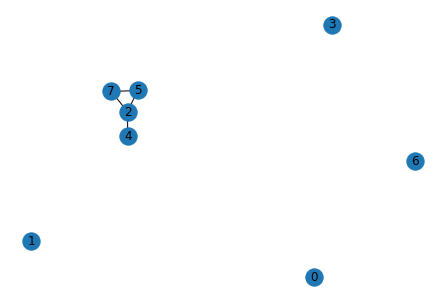

In [22]:
for i in range(6):
    G = nx.from_numpy_matrix(game4[i])
    plt.figure(i)
    nx.draw(G,with_labels=True)
plt.show()

In [23]:
print(game4[0])

[[0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]]


In [24]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time
def kNeighbor(array):
    prediction = [0]*(len(array))
    for i in range(len(array)):
        if array[i] == 1:
            roll = random.randint(1,100)
            if roll <= 50:
                prediction[i]=0
            elif roll >= 51:
                prediction[i]=1
    return prediction


In [25]:
print(kNeighbor(game4[0][:,6]))

[1, 0, 0, 0, 0, 0, 1, 0]


In [26]:
games=loadGame(12,8)
print(games[0])

network id:12	 length(x 1/3 second): 5571	 num of players: 8
[[0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]]


In [133]:
def prediction(array):
    returnArr = array
    for i in range(len(array)):
        for j in range(len(array[0])):
            if returnArr[i][j] == 0:
                roll = random.randint(1,100)
                if roll <= 90:
                    returnArr[i][j]=0
                else:
                    returnArr[i][j]=1
            else:
                roll = random.randint(1,100)
                if roll <= 20:
                    returnArr[i][j]=0
                else:
                    returnArr[i][j]=1
    for i in range(len(array[0])):
        returnArr[:,i]=kNeighbor(returnArr[:,i])
    return returnArr
    

In [134]:
print(prediction(game4[0]))

[[1 0 1 0 0 1 1 0]
 [1 1 1 1 1 1 0 1]
 [0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0]
 [1 0 1 1 0 0 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [125]:
def drawGraphs(array,count):
    for i in range(count):
        G = nx.from_numpy_matrix(array[i])
        plt.figure(i)
        nx.draw(G,with_labels=True)
    plt.show()

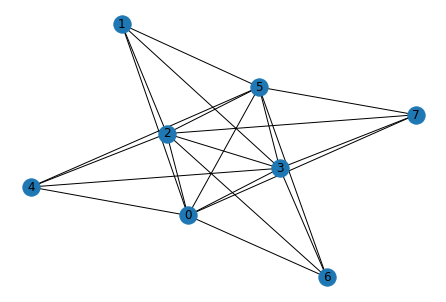

In [107]:

    G = nx.from_numpy_matrix(prediction(game4[0]))
    plt.figure(i)
    nx.draw(G,with_labels=True)
plt.show()

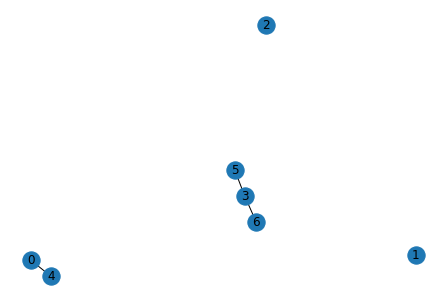

In [111]:

    G = nx.from_numpy_matrix(game3[0])
    plt.figure(i)
    nx.draw(G,with_labels=True)
plt.show()

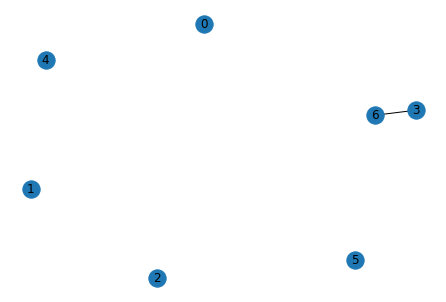

In [112]:

    G = nx.from_numpy_matrix(game3[1])
    plt.figure(i)
    nx.draw(G,with_labels=True)
plt.show()

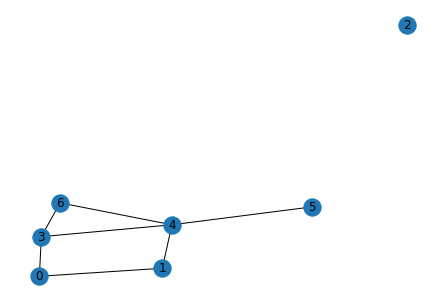

In [135]:

    G = nx.from_numpy_matrix(prediction(game3[2]))
    plt.figure(i)
    nx.draw(G,with_labels=True)
plt.show()

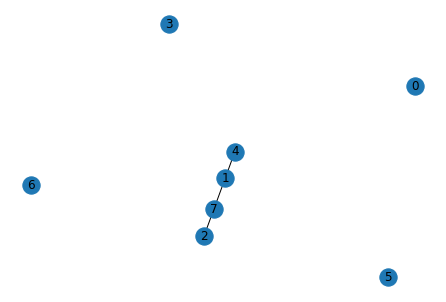

In [138]:

    G = nx.from_numpy_matrix(prediction(game4[1]))
    nx.draw(G,with_labels=True)
plt.show()